In [61]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import os
import numpy as np 
import matplotlib.pyplot as plt

In [62]:
iris=datasets.load_iris()
X=iris.data
y=iris.target
X_tain,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [63]:
DTC=DecisionTreeClassifier(max_depth=3,max_leaf_nodes=3)
DTC.fit(X_tain,y_train)
print(DTC.feature_importances_) # 每个特征的重要性
print(iris.feature_names)

[0. 0. 0. 1.]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [64]:
DTC.score(X_test,y_test) # 在测试集上的准确率

0.9666666666666667

### 评估指标

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,DTC.predict(X_test))) # 在每一类上的预测指标（准确率、召回率、f1）

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



### 查看决策树长什么样

In [66]:
export_graphviz(DTC,out_file='decision_tree.dot',feature_names=iris.feature_names,class_names=iris.target_names) # 指定模型，保存成dot后缀文件。传入属性和类别
graph = pydotplus.graph_from_dot_file('decision_tree.dot') 

In [67]:
file_path='decision_tree.dot'
# 生成png图像

try: 
    os.system('dot -Tpng '+file_path+' -o '+'decision_tree.png')  # png
    print('Successful')
except:
    print('Failed Somehow') 

Successful


### 决策树在回归任务中的使用

In [68]:
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("altavish/boston-housing-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\HANXIN\.cache\kagglehub\datasets\altavish\boston-housing-dataset\versions\1


In [69]:
data=pd.read_csv('./data/HousingData.csv')
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [70]:
data.fillna(0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,0.00,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


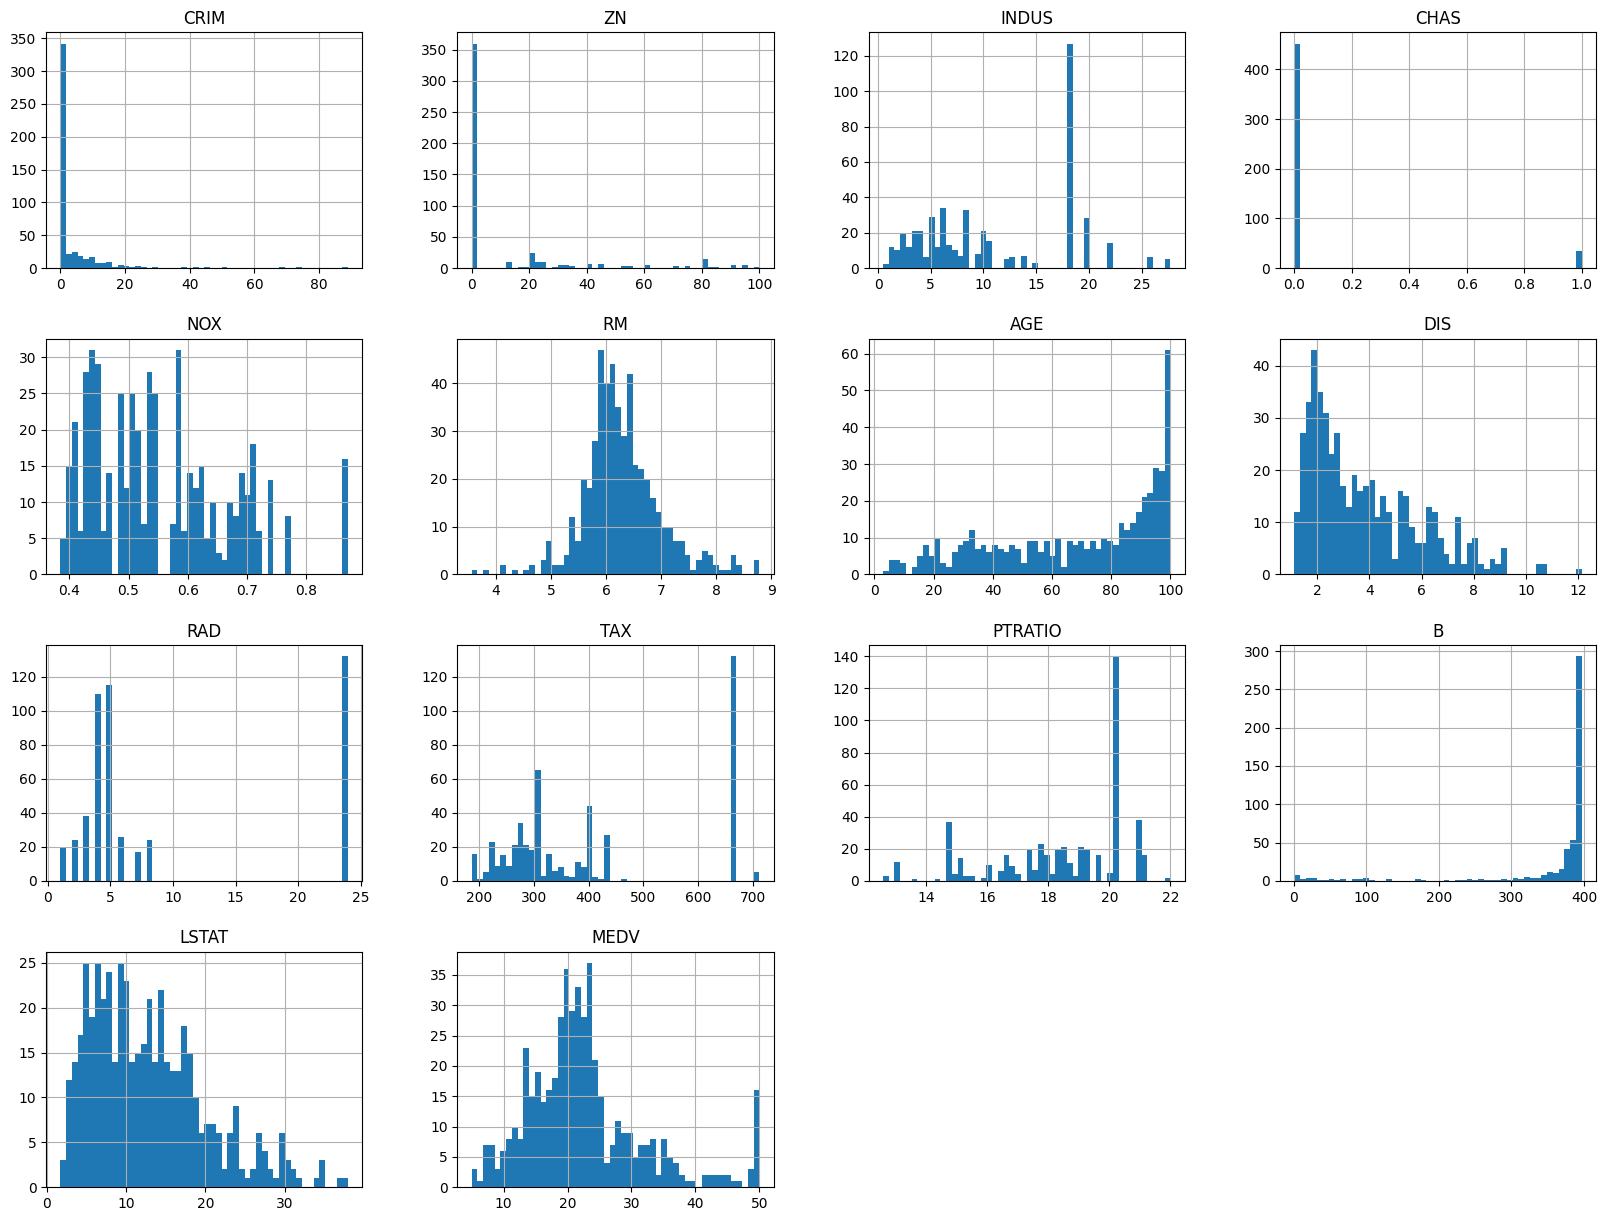

In [71]:
data.hist(bins=50,figsize=(20,15))
plt.show()

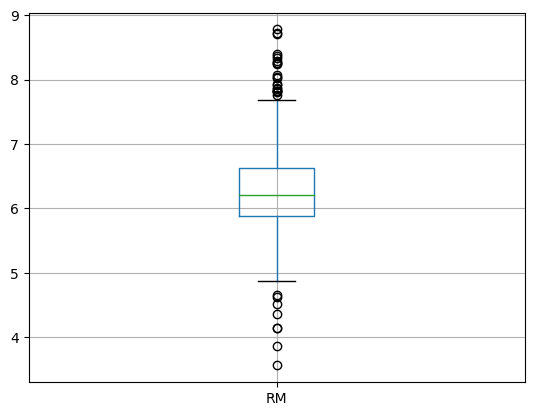

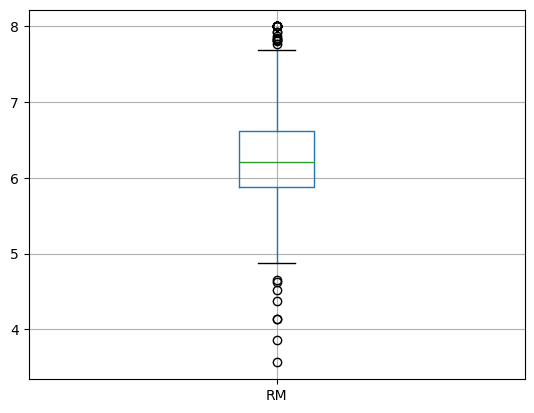

In [72]:
data.boxplot(column='RM')
plt.show()
data.loc[data['RM']>8,'RM']=8 # rm大于8算异常值，全部改为8
data.boxplot(column='RM')
plt.show()

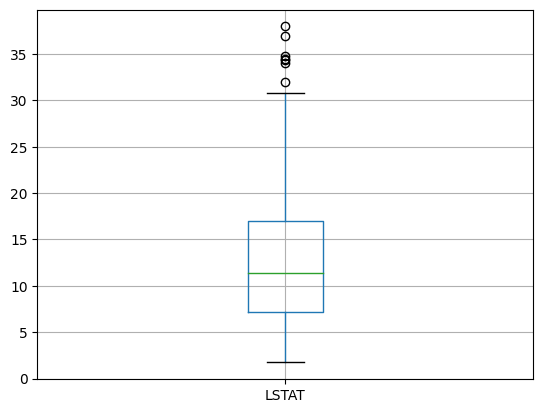

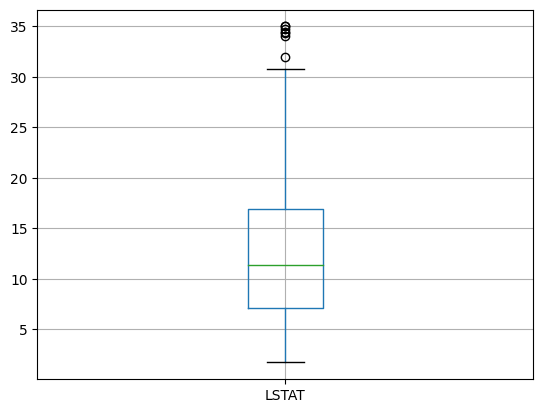

In [73]:
data.boxplot(column='LSTAT')
plt.show()
data.loc[data['LSTAT']>35,'LSTAT']=35
data.boxplot(column='LSTAT')
plt.show()

### 提取特征和标签

In [74]:
# 拆分特征值和目标变量
x=data.drop(columns='MEDV',axis=1) # 删除MEDV列
y=data['MEDV']
x=x.values
y=y.values
# 以8：2的比例拆分训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)
X_train.shape,y_test.shape

((404, 13), (102,))

In [75]:
y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)
y_test.shape

(102, 1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DCT2=DecisionTreeRegressor(max_depth=5) # 损失函数还是MSE
DCT2.fit(X_train,y_train)
print(DCT2.score(X_train,y_train))

0.9215700137578628


In [77]:
export_graphviz(DCT2,out_file='regress_tree.dot',feature_names=data.columns[0:-1])

In [78]:
file_path='regress_tree.dot'
# 生成png图像

try: 
    os.system('dot -Tpng '+file_path+' -o '+'regress_tree.png')  # png
    print('Successful')
except:
    print('Failed Somehow') 

Successful


In [80]:
DCT2.predict(X_test)

array([21.27516779, 15.79722222, 28.3       , 34.44230769, 11.975     ,
       34.44230769, 21.27516779, 24.0625    , 21.27516779, 19.58      ,
       15.79722222, 24.0625    , 21.27516779,  8.78823529, 15.79722222,
       12.4       , 19.58      , 21.27516779, 28.52222222, 24.0625    ,
       24.0625    , 21.27516779, 28.52222222, 21.27516779, 24.0625    ,
       34.44230769, 21.27516779, 21.27516779, 21.27516779, 19.58      ,
       24.0625    , 28.52222222, 15.79722222, 11.975     , 28.52222222,
       21.27516779, 21.27516779, 21.27516779, 21.27516779, 28.52222222,
       24.0625    , 28.52      , 21.27516779, 21.27516779, 24.0625    ,
       34.44230769, 21.27516779, 19.58      , 28.52      , 19.58      ,
       19.58      , 21.27516779, 24.0625    ,  8.78823529, 21.27516779,
       45.48333333, 15.79722222, 21.27516779, 21.27516779, 12.4       ,
       15.79722222, 34.44230769, 21.27516779, 24.0625    , 19.58      ,
        8.78823529, 19.58      , 21.27516779, 15.79722222, 21.27